In [51]:
# data analysis by Yash Vardhan

import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [52]:
df = pd.read_excel('ECG.xlsx')

In [53]:
df.drop(['_id', 'ecg_path', 'pet_id'], axis = 1, inplace = True)
df.head()

,duration,breeds,weight,age,segments_br,segments_hr,ecg_pulses,bad_ecg
0,300.12,boxer,34.0,4.5,"[{'deb': 200.0, 'fin': 240.0, 'value': 13.24}]",NaN,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]"
1,300.08,boxer,34.0,4.5,"[{'deb': 240.0, 'fin': 280.0, 'value': 12.34},...",NaN,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]"
2,300.08,boxer,34.0,4.5,"[{'deb': 210.0, 'fin': 250.0, 'value': 12.01},...","[{'deb': 90.0, 'fin': 110.0, 'value': 56.39}, ...","[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]"
3,300.14,boxer,34.0,4.5,"[{'deb': 50.0, 'fin': 90.0, 'value': 13.13}]","[{'deb': 240.0, 'fin': 260.0, 'value': 52.43},...","[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14..."
4,300.12,boxer,34.0,4.5,"[{'deb': 100.0, 'fin': 140.0, 'value': 13.99}]","[{'deb': 250.0, 'fin': 270.0, 'value': 46.81},...","[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]"


In [54]:
def extract_value_from_string(s):
    if isinstance(s, str):
        match = re.search(r"'value'\s*:\s*([\d.]+)", s)
        if match:
            return float(match.group(1))
    return None

df['breathing_rate'] = df['segments_br'].apply(extract_value_from_string)
df['heart_rate'] = df['segments_hr'].apply(extract_value_from_string)

In [55]:
df.head()

,duration,breeds,weight,age,segments_br,segments_hr,ecg_pulses,bad_ecg,breathing_rate,heart_rate
0,300.12,boxer,34.0,4.5,"[{'deb': 200.0, 'fin': 240.0, 'value': 13.24}]",NaN,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]",13.24,NaN
1,300.08,boxer,34.0,4.5,"[{'deb': 240.0, 'fin': 280.0, 'value': 12.34},...",NaN,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]",12.34,NaN
2,300.08,boxer,34.0,4.5,"[{'deb': 210.0, 'fin': 250.0, 'value': 12.01},...","[{'deb': 90.0, 'fin': 110.0, 'value': 56.39}, ...","[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]",12.01,56.39
3,300.14,boxer,34.0,4.5,"[{'deb': 50.0, 'fin': 90.0, 'value': 13.13}]","[{'deb': 240.0, 'fin': 260.0, 'value': 52.43},...","[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14...",13.13,52.43
4,300.12,boxer,34.0,4.5,"[{'deb': 100.0, 'fin': 140.0, 'value': 13.99}]","[{'deb': 250.0, 'fin': 270.0, 'value': 46.81},...","[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]",13.99,46.81


In [56]:
df.drop(['segments_br', 'segments_hr'], axis = 1, inplace = True)

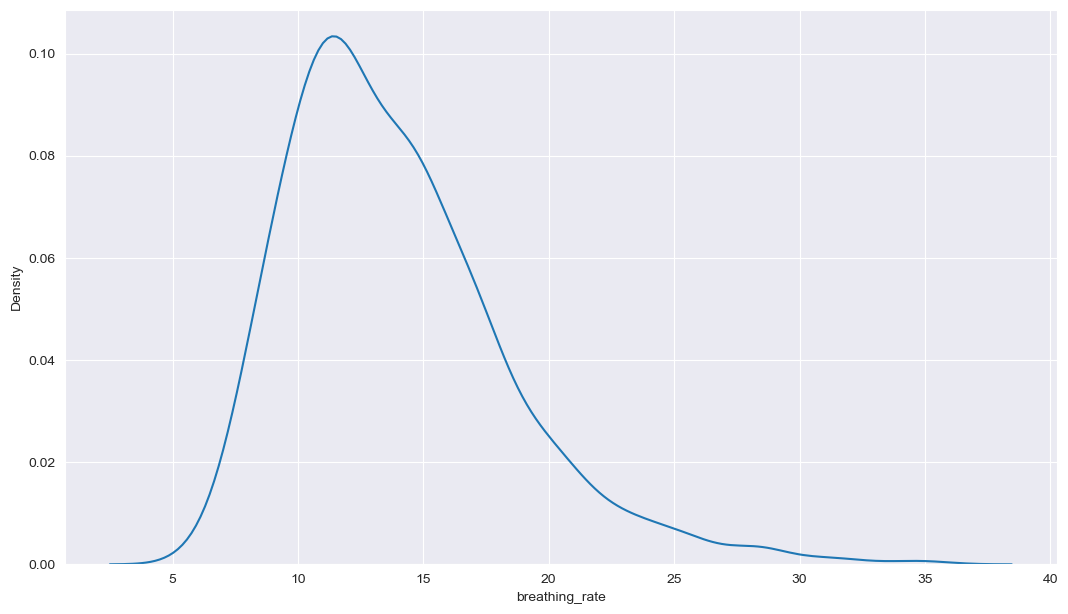

In [57]:
sns.kdeplot(df['breathing_rate'])
plt.gcf().set_size_inches(12.8, 7.2)
plt.show()

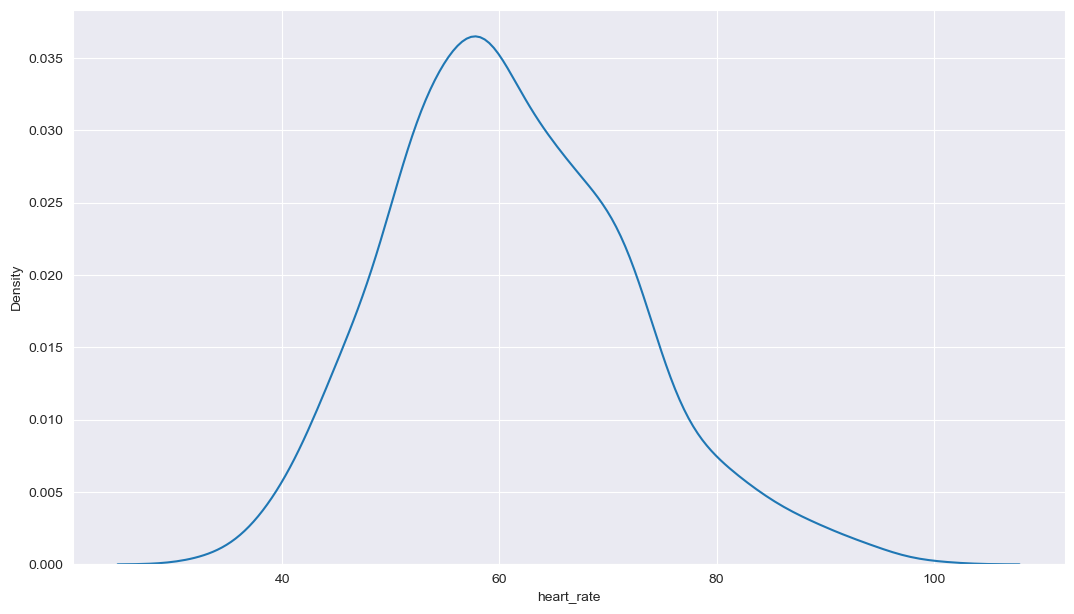

In [58]:
sns.kdeplot(df['heart_rate'])
plt.gcf().set_size_inches(12.8, 7.2)
plt.show()

In [59]:
df.breathing_rate.fillna(df.breathing_rate.mean(), inplace = True)
df.heart_rate.fillna(df.heart_rate.mean(), inplace = True)

/var/folders/t9/g5x_d7z527d211lqjn5843q80000gn/T/ipykernel_1617/4087427893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.breathing_rate.fillna(df.breathing_rate.mean(), inplace = True)
/var/folders/t9/g5x_d7z527d211lqjn5843q80000gn/T/ipykernel_1617/4087427893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [60]:
df.head()

,duration,breeds,weight,age,ecg_pulses,bad_ecg,breathing_rate,heart_rate
0,300.12,boxer,34.0,4.5,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]",13.24,61.067087
1,300.08,boxer,34.0,4.5,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]",12.34,61.067087
2,300.08,boxer,34.0,4.5,"[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]",12.01,56.390000
3,300.14,boxer,34.0,4.5,"[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14...",13.13,52.430000
4,300.12,boxer,34.0,4.5,"[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]",13.99,46.810000


In [61]:
encoder = LabelEncoder()
df['breeds'] = encoder.fit_transform(df['breeds'])
df.head()


,duration,breeds,weight,age,ecg_pulses,bad_ecg,breathing_rate,heart_rate
0,300.12,6,34.0,4.5,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]",13.24,61.067087
1,300.08,6,34.0,4.5,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]",12.34,61.067087
2,300.08,6,34.0,4.5,"[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]",12.01,56.390000
3,300.14,6,34.0,4.5,"[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14...",13.13,52.430000
4,300.12,6,34.0,4.5,"[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]",13.99,46.810000


In [62]:
df['bad_ecg'] = df['bad_ecg'].apply(lambda x: np.nan if x == [] or x == '[]' else x)

In [63]:
df.head(10)

,duration,breeds,weight,age,ecg_pulses,bad_ecg,breathing_rate,heart_rate
0,300.12,6,34.0,4.5,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]",13.24,61.067087
1,300.08,6,34.0,4.5,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]",12.34,61.067087
2,300.08,6,34.0,4.5,"[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]",12.01,56.390000
3,300.14,6,34.0,4.5,"[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14...",13.13,52.430000
4,300.12,6,34.0,4.5,"[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]",13.99,46.810000
5,300.17,6,34.0,4.5,"[2.36, 3.74, 4.35, 4.92, 6.75, 8.45, 9.05, 10....","[(28.0, 54.0), (106.0, 132.0), (184.0, 236.0)]",9.67,46.570000
6,300.08,6,34.0,4.5,"[0.88, 1.95, 2.85, 3.44, 3.98, 4.52, 5.68, 7.2...",NaN,14.50,49.840000
7,300.14,6,34.0,4.5,"[1.09, 1.83, 2.46, 4.26, 5.82, 6.69, 7.4, 9.32...","[(210.0, 236.0), (262.0, 298.1462)]",15.12,52.350000
8,300.12,6,34.0,4.5,"[1.04, 1.98, 3.02, 3.31, 3.77, 4.95, 6.01, 6.4...","[(2.0, 28.0), (54.0, 106.0)]",15.58,57.180000
9,300.17,6,34.0,4.5,"[1.05, 2.66, 3.43, 4.04, 4.77, 6.65, 8.08, 9.1...",NaN,9.84,56.450000


In [64]:
df_bad = df[df['bad_ecg'].notna()]
df_good = df[df['bad_ecg'].isna()]
df_bad_upsampled = resample(
    df_bad,
    replace=True,
    n_samples=len(df_good),
    random_state=42
)
df_bad_upsampled = pd.concat([df_good, df_bad_upsampled]).reset_index(drop=True)

In [65]:
df.head(10)

,duration,breeds,weight,age,ecg_pulses,bad_ecg,breathing_rate,heart_rate
0,300.12,6,34.0,4.5,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]",13.24,61.067087
1,300.08,6,34.0,4.5,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]",12.34,61.067087
2,300.08,6,34.0,4.5,"[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]",12.01,56.390000
3,300.14,6,34.0,4.5,"[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14...",13.13,52.430000
4,300.12,6,34.0,4.5,"[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]",13.99,46.810000
5,300.17,6,34.0,4.5,"[2.36, 3.74, 4.35, 4.92, 6.75, 8.45, 9.05, 10....","[(28.0, 54.0), (106.0, 132.0), (184.0, 236.0)]",9.67,46.570000
6,300.08,6,34.0,4.5,"[0.88, 1.95, 2.85, 3.44, 3.98, 4.52, 5.68, 7.2...",NaN,14.50,49.840000
7,300.14,6,34.0,4.5,"[1.09, 1.83, 2.46, 4.26, 5.82, 6.69, 7.4, 9.32...","[(210.0, 236.0), (262.0, 298.1462)]",15.12,52.350000
8,300.12,6,34.0,4.5,"[1.04, 1.98, 3.02, 3.31, 3.77, 4.95, 6.01, 6.4...","[(2.0, 28.0), (54.0, 106.0)]",15.58,57.180000
9,300.17,6,34.0,4.5,"[1.05, 2.66, 3.43, 4.04, 4.77, 6.65, 8.08, 9.1...",NaN,9.84,56.450000


In [66]:
df

,duration,breeds,weight,age,ecg_pulses,bad_ecg,breathing_rate,heart_rate
0,300.12,6,34.0,4.5,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]",13.240000,61.067087
1,300.08,6,34.0,4.5,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]",12.340000,61.067087
2,300.08,6,34.0,4.5,"[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]",12.010000,56.390000
3,300.14,6,34.0,4.5,"[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14...",13.130000,52.430000
4,300.12,6,34.0,4.5,"[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]",13.990000,46.810000
...,...,...,...,...,...,...,...,...
1118,72.92,14,22.0,1.1,"[1.22, 1.71, 2.3, 3.62, 4.25, 4.72, 5.28, 6.52...",NaN,13.903283,62.670000
1119,224.60,0,23.0,2.1,"[0.98, 2.29, 3.26, 3.98, 5.02, 5.67, 6.5, 7.28...",NaN,13.903283,58.250000
1120,220.42,0,23.0,2.1,"[0.7, 1.38, 2.78, 3.6, 4.76, 5.72, 6.49, 7.66,...",NaN,13.903283,65.090000
1121,21.98,24,11.7,2.5,"[1.01, 2.17, 3.19, 4.22, 4.96, 5.72, 6.25, 6.7...",NaN,13.903283,59.480000


In [67]:
df.rename(columns = {'duration' : 'duration (seconds)', 'weight' : 'weight (Kg)', 'age' : 'age (years)', 'breathing_rate' : 'breathing_rate (BPM)', 'heart_rate' : 'heart_rate (BPM)'}, inplace = True)

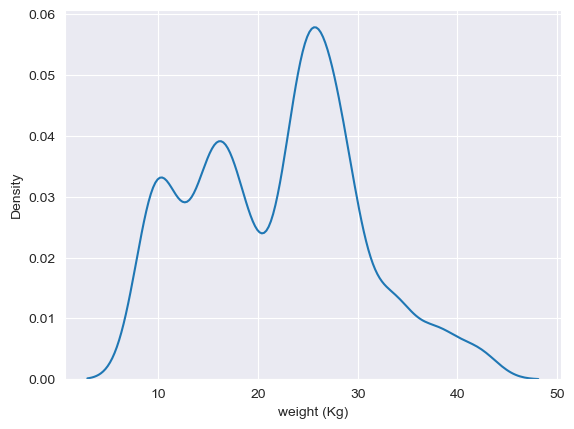

In [68]:
sns.kdeplot(df["weight (Kg)"])
plt.show()

In [76]:
df.drop(df.columns[2], axis =1, inplace = True )

In [78]:
df.insert(3, "Resting Energy Requirement(Kcal/day)", 70 * (df['weight (Kg)'] ** 0.75))

In [88]:
df["Canine Vital Index"] = (df["heart_rate (BPM)"] * df["breathing_rate (BPM)"]) / (df["weight (Kg)"] * 101.1) * 100

In [93]:
df.rename(columns = {"Canine Vital Index" : "Canine Vital Index (at 101.1°F)"}, inplace = True)

In [90]:
df["Canine Vital Index (at 101.3°F)"] = (df["heart_rate (BPM)"] * df["breathing_rate (BPM)"]) / (df["weight (Kg)"] * 101.3) * 100

In [91]:
df["Canine Vital Index (at 101.5°F)"] = (df["heart_rate (BPM)"] * df["breathing_rate (BPM)"]) / (df["weight (Kg)"] * 101.5) * 100

In [94]:
df

,duration (seconds),breeds,weight (Kg),Resting Energy Requirement(Kcal/day),age (years),ecg_pulses,bad_ecg,breathing_rate (BPM),heart_rate (BPM),Canine Vital Index (at 101.1°F),Canine Vital Index (at 101.3°F),Canine Vital Index (at 101.5°F)
0,300.12,6,34.0,985.614826,4.5,"[0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.5...","[(2.0, 132.0), (184.0, 298.1231)]",13.240000,61.067087,23.521505,23.475066,23.428810
1,300.08,6,34.0,985.614826,4.5,"[0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3,...","[(2.0, 298.0769)]",12.340000,61.067087,21.922612,21.879329,21.836217
2,300.08,6,34.0,985.614826,4.5,"[0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3...","[(2.0, 80.0), (132.0, 158.0)]",12.010000,56.390000,19.702214,19.663315,19.624570
3,300.14,6,34.0,985.614826,4.5,"[0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43...","[(28.0, 106.0), (158.0, 210.0), (262.0, 298.14...",13.130000,52.430000,20.026936,19.987396,19.948012
4,300.12,6,34.0,985.614826,4.5,"[1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94...","[(28.0, 236.0)]",13.990000,46.810000,19.051373,19.013759,18.976294
...,...,...,...,...,...,...,...,...,...,...,...,...
1118,72.92,14,22.0,711.074412,1.1,"[1.22, 1.71, 2.3, 3.62, 4.25, 4.72, 5.28, 6.52...",NaN,13.903283,62.670000,39.174479,39.097135,39.020097
1119,224.60,0,23.0,735.180395,2.1,"[0.98, 2.29, 3.26, 3.98, 5.02, 5.67, 6.5, 7.28...",NaN,13.903283,58.250000,34.828463,34.759700,34.691208
1120,220.42,0,23.0,735.180395,2.1,"[0.7, 1.38, 2.78, 3.6, 4.76, 5.72, 6.49, 7.66,...",NaN,13.903283,65.090000,38.918191,38.841354,38.764819
1121,21.98,24,11.7,442.830409,2.5,"[1.01, 2.17, 3.19, 4.22, 4.96, 5.72, 6.25, 6.7...",NaN,13.903283,59.480000,69.911933,69.773904,69.636418


In [95]:
df.to_csv("updated_dataset_iter2.csv", index = False)
